In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


df = pd.read_csv("/Users/sanjay/Desktop/UberStockAnalysis/UBER.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500


In [6]:
# Checking for any missing values
for colnames in df.columns:
    percent_na = np.mean(df[colnames].isnull())
    print(f"{colnames}-{round(percent_na)* 100}")

Date-0
Open-0
High-0
Low-0
Close-0
Adj Close-0
Volume-0


In [7]:
# Convert date column into date-time data type
df["Date"] = df["Date"].astype("datetime64")

Text(0.5, 1.0, 'Highest Uber Stock Bids from 2020-2022')

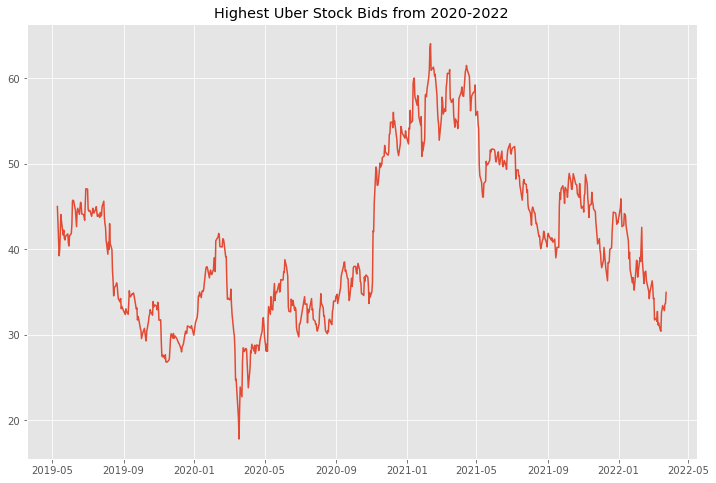

In [10]:
# Time vs High Uber Stock Bids

plt.plot(df["Date"], df["High"])

plt.title("Highest Uber Stock Bids from 2020-2022")




Text(0.5, 1.0, 'Lowest Uber Stock Bids from 2019-2022')

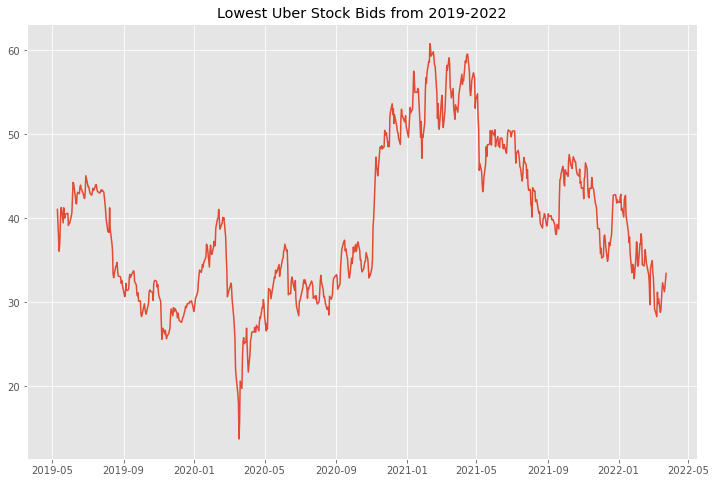

In [11]:
# Time vs Low Uber Stock Bids

plt.plot(df["Date"], df["Low"])
plt.title("Lowest Uber Stock Bids from 2019-2022")

Text(0.5, 1.0, 'Volume of Uber Stocks from 2019-2022')

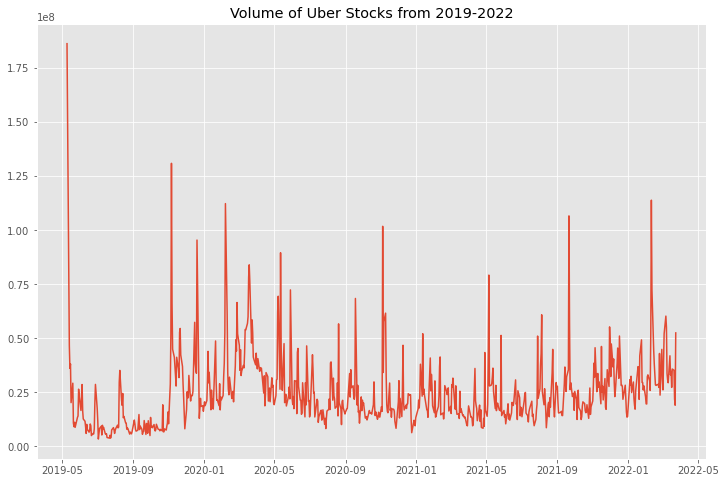

In [16]:
# Date vs Volume of Stocks 

plt.plot(df["Date"], df["Volume"])
plt.title("Volume of Uber Stocks from 2019-2022")

In [31]:
# Calculating Rolling Mean and Std

rolling_mean = df.rolling(window = 1).mean()
rolling_std = df.rolling(window = 6).std()

print(rolling_mean, rolling_std)

          Open       High        Low      Close  Adj Close       Volume
0    42.000000  45.000000  41.060001  41.570000  41.570000  186322500.0
1    38.790001  39.240002  36.080002  37.099998  37.099998   79442400.0
2    38.310001  39.959999  36.849998  39.959999  39.959999   46661100.0
3    39.369999  41.880001  38.950001  41.290001  41.290001   36086100.0
4    41.480000  44.060001  41.250000  43.000000  43.000000   38115500.0
..         ...        ...        ...        ...        ...          ...
720  32.520000  33.419998  32.330002  33.360001  33.360001   35779700.0
721  32.820000  32.820000  31.250000  31.980000  31.980000   35200600.0
722  31.930000  33.599998  31.840000  33.349998  33.349998   21852800.0
723  32.709999  33.680000  32.570000  33.060001  33.060001   19024700.0
724  34.740002  34.950001  33.439999  34.700001  34.700001   52492200.0

[725 rows x 6 columns]          Open      High       Low     Close  Adj Close        Volume
0         NaN       NaN       NaN       NaN

/var/folders/wx/q1jmzm0j1xz16s45y4d2kz2m0000gn/T/ipykernel_36126/193074809.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  rolling_mean = df.rolling(window = 1).mean()
/var/folders/wx/q1jmzm0j1xz16s45y4d2kz2m0000gn/T/ipykernel_36126/193074809.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  rolling_std = df.rolling(window = 6).std()


In [48]:
# Candlestick Charts

candle = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])
candle.show()

<AxesSubplot:xlabel='High', ylabel='Volume'>

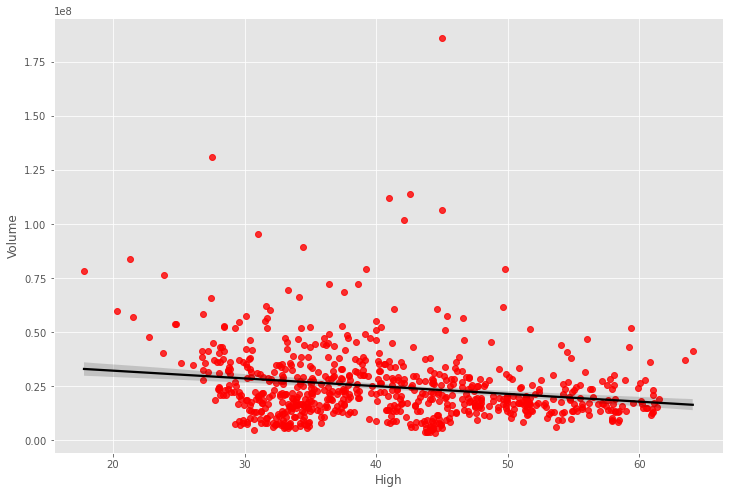

In [50]:
# Correlation Between Volume of stocks and the Highest Bid during trading day

sns.regplot(x = "High", y = "Volume", data = df, scatter_kws={"color" :"red"}, line_kws = {"color" : "black"})


In [44]:
# References
# https://www.kaggle.com/datasets/varpit94/uber-stock-data/code
# https://plotly.com/python/candlestick-charts/

,Open,High,Low,Close,Adj Close,Volume
count,725.000000,725.000000,725.000000,725.000000,725.000000,7.250000e+02
mean,40.166447,40.961435,39.261123,40.107255,40.107255,2.472855e+07
std,9.198940,9.259164,9.075919,9.141862,9.141862,1.691406e+07
min,15.960000,17.799999,13.710000,14.820000,14.820000,3.380000e+06
25%,32.730000,33.419998,31.983000,32.799999,32.799999,1.423060e+07
50%,39.000000,39.959999,38.009998,38.810001,38.810001,2.079540e+07
75%,46.700001,47.520000,45.860001,46.419998,46.419998,3.011960e+07
max,63.250000,64.050003,60.799999,63.180000,63.180000,1.863225e+08
